<a href='https://aims-senegal.org/'> <img src='http://sn.nexteinstein.org/wp-content/uploads/sites/12/2016/07/aims_senegal.jpg' /></a>

# **Finance Data Analysis**

In this notebook we will focus on exploratory data analysis of stock prices. 

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to use pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)





---



## The Imports

Already filled out for you.

In [88]:
from pandas_datareader import data
import pandas as pd
# import datetime.datetime as dt
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects: use datatime.date(year, month, day).
2. Figure out the ticker symbol for each bank (GOOGLE IT XD) 
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK, "yahoo" seems to work fine. 
------------


In [89]:
start = datetime(2006, 9, 1)
end = datetime(2018, 9, 1)

In [90]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [91]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-09-01,51.840000,51.299999,51.830002,51.660000,9775300.0,39.198116
2006-09-05,51.889999,51.490002,51.619999,51.750000,8992800.0,39.266411
2006-09-06,51.910000,51.419998,51.500000,51.650002,10342800.0,39.190536
2006-09-07,51.869999,51.430000,51.639999,51.509998,9487400.0,39.084297
2006-09-08,51.810001,51.200001,51.400002,51.660000,10082700.0,39.198116
...,...,...,...,...,...,...
2018-08-27,31.490000,30.990000,31.030001,31.309999,47729300.0,29.505632
2018-08-28,31.410000,31.190001,31.360001,31.270000,38539000.0,29.467939
2018-08-29,31.309999,31.070000,31.240000,31.139999,46401800.0,29.345428


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [92]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
banks = [BAC, C, GS, JPM, MS, WFC]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

check the docs for pd.concat

In [93]:
data = {k: v for k,v in zip(tickers, banks)}
bank_stocks = pd.concat(data, axis=1)
bank_stocks

BAC                        ...        WFC                       
                 High        Low       Open  ...      Close      Volume  Adj Close
Date                                         ...                                  
2006-09-01  51.840000  51.299999  51.830002  ...  34.820000   6150900.0  23.092463
2006-09-05  51.889999  51.490002  51.619999  ...  34.830002   6165500.0  23.099089
2006-09-06  51.910000  51.419998  51.500000  ...  35.040001   8283200.0  23.238369
2006-09-07  51.869999  51.430000  51.639999  ...  34.669998   6723800.0  22.992983
2006-09-08  51.810001  51.200001  51.400002  ...  34.980000   6596700.0  23.198568
...               ...        ...        ...  ...        ...         ...        ...
2018-08-27  31.490000  30.990000  31.030001  ...  59.099998  19915200.0  54.013432
2018-08-28  31.410000  31.190001  31.360001  ...  59.070000  19330200.0  53.986015
2018-08-29  31.309999  31.070000  31.240000  ...  58.959999  14436600.0  53.885475
2018-08-30  31.150000  30.950001  31.020000  ...  58.459999  14800900.0  53.428513
2018-08-31  30.950001  30.620001  30.879999  ...  58.480000  16720200.0  53.446796

[3021 rows x 36 columns]

**Set the column name levels (this is filled out for you):**

In [94]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-09-01   51.840000  51.299999  51.830002  ...  34.820000   6150900.0  23.092463
2006-09-05   51.889999  51.490002  51.619999  ...  34.830002   6165500.0  23.099089
2006-09-06   51.910000  51.419998  51.500000  ...  35.040001   8283200.0  23.238369
2006-09-07   51.869999  51.430000  51.639999  ...  34.669998   6723800.0  22.992983
2006-09-08   51.810001  51.200001  51.400002  ...  34.980000   6596700.0  23.198568
...                ...        ...        ...  ...        ...         ...        ...
2018-08-27   31.490000  30.990000  31.030001  ...  59.099998  19915200.0  54.013432
2018-08-28   31.410000  31.190001  31.360001  ...  59.070000  19330200.0  53.986015
2018-08-29   31.309999  31.070000  31.240000  ...  58.959999  14436600.0  53.885475
2018-08-30   31.150000  30.950001  31.020000  ...  58.459999  14800900.0  53.428513
2018-08-31   30.950001  30.620001  30.879999  ...  58.480000  16720200.0  53.446796

[3021 rows x 36 columns]

**Check the head of the bank_stocks dataframe.**

In [95]:
# your code should be here
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                      
Stock Info        High        Low       Open  ...      Close     Volume  Adj Close
Date                                          ...                                 
2006-09-01   51.840000  51.299999  51.830002  ...  34.820000  6150900.0  23.092463
2006-09-05   51.889999  51.490002  51.619999  ...  34.830002  6165500.0  23.099089
2006-09-06   51.910000  51.419998  51.500000  ...  35.040001  8283200.0  23.238369
2006-09-07   51.869999  51.430000  51.639999  ...  34.669998  6723800.0  22.992983
2006-09-08   51.810001  51.200001  51.400002  ...  34.980000  6596700.0  23.198568

[5 rows x 36 columns]

In [ ]:
#expected answer, Don't run this cell

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.658106
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.418499
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.395836
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.515644
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.512400

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this analysis.

**What is the max Close price for each bank's stock throughout the time period?**

In [96]:
#your code should be here
bank_stocks[[i for i in bank_stocks.columns if i[1] == 'Close']].max()

Bank Ticker  Stock Info
BAC          Close          54.900002
C            Close         564.099976
GS           Close         273.380005
JPM          Close         118.769997
MS           Close          89.300003
WFC          Close          65.930000
dtype: float64

In [97]:
# or
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

In [ ]:
#expected answer, Don't run this cell

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [98]:
# use this cell to create an empty data frame called returns
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [99]:
#your code should be here
for tick in tickers:
  returns[f'{tick} Return'] = bank_stocks[tick]['Close'].pct_change()
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-05,0.001742,0.001013,0.014349,0.001531,0.008828,0.000287
2006-09-06,-0.001932,-0.005868,-0.004032,0.001747,-0.019579,0.006029
2006-09-07,-0.002711,-0.011805,-0.013938,-0.014821,-0.002118,-0.010559
2006-09-08,0.002912,0.003502,0.008279,0.001327,0.011067,0.008941
...,...,...,...,...,...,...
2018-08-27,0.013597,0.024338,0.031857,0.017701,0.036352,0.006986
2018-08-28,-0.001278,-0.000138,-0.000948,-0.004884,0.002205,-0.000508
2018-08-29,-0.004157,0.002072,-0.004002,-0.003272,-0.001000,-0.001862


In [ ]:
#expected answer, Don't run this cell

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

please refer to [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for creating pairplot using seaborn 

<Figure size 900x600 with 0 Axes>

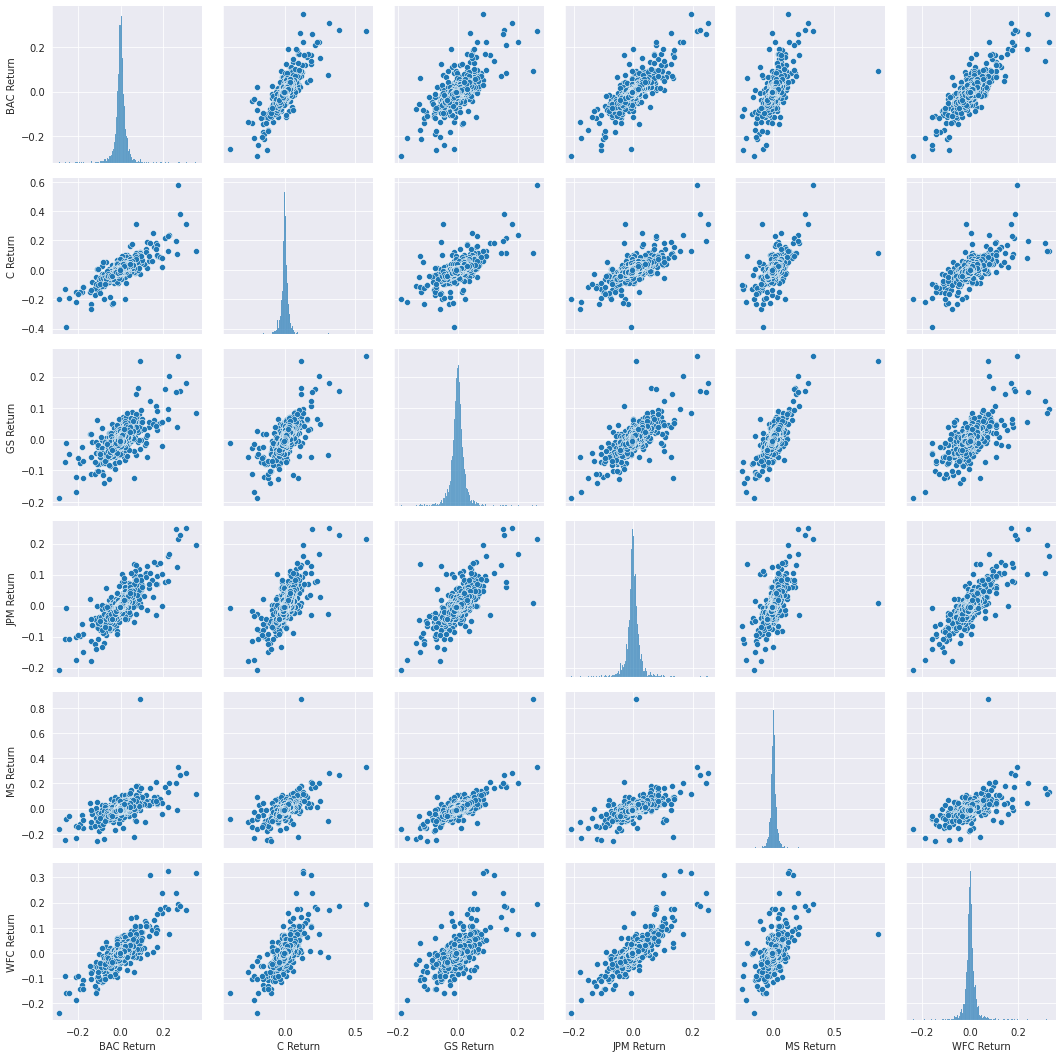

In [100]:
# your code should be here
plt.figure(dpi=150)
sns.set_style("darkgrid")
# sns.pairplot(returns)
pg = sns.PairGrid(returns)
pg.map_offdiag(sns.scatterplot)
pg.map_diag(sns.histplot)
plt.show()

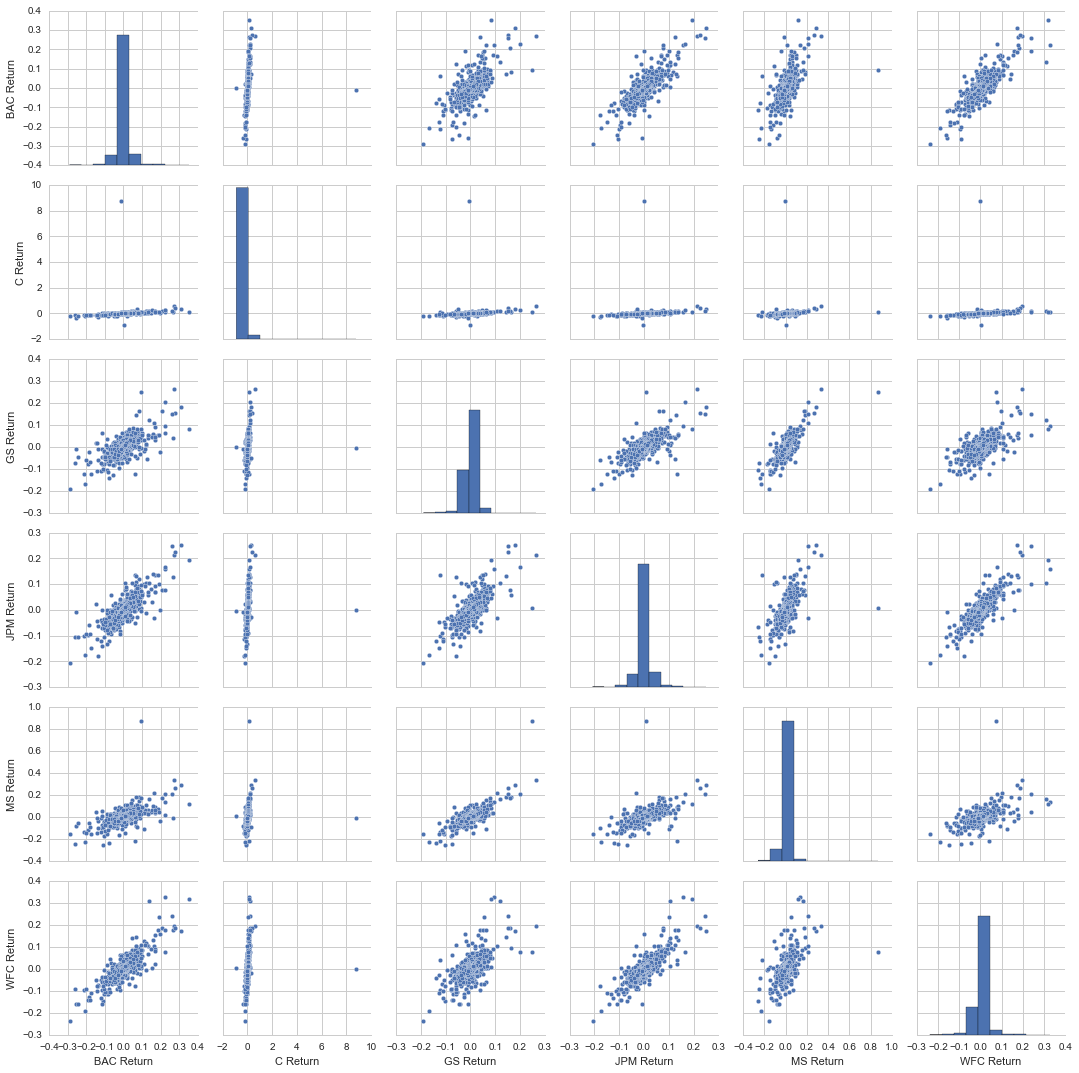

In [ ]:
#expected answer, Don't run this cell



---



**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

First inauguration of Barack Obama as the 44th President of the United States of America.

In [101]:
# your code should be here
print('Best single day returns: \n', returns.idxmax())

Best single day returns: 
 BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]


In [ ]:
#expected answer, Don't run this cell

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [102]:
# your code should be here
print('Worst single day returns: \n', returns.idxmin())

Worst single day returns: 
 BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]


In [ ]:
#expected answer, Don't run this cell

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another**



---



---



---



**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

The higher the standard deviation, the riskier the investment, so it is Goldman Sachs's stock.

In 2015, it was Wells Fargo's stock.

In [103]:
# your code should be here
returns.std()

BAC Return    0.034295
C Return      0.035994
GS Return     0.023916
JPM Return    0.025868
MS Return     0.035301
WFC Return    0.028256
dtype: float64

In [ ]:
#expected answer, Don't run this cell

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [107]:
# your code should be here
ret = returns.reset_index()
ret_2015 = ret[returns.reset_index()['Date'].apply(lambda x: x.year == 2015)]
ret_2015.std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [ ]:
#expected answer, Don't run this cell

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

Look at the documentation: [distplot using seaborn](https://seaborn.pydata.org/generated/seaborn.distplot.html)

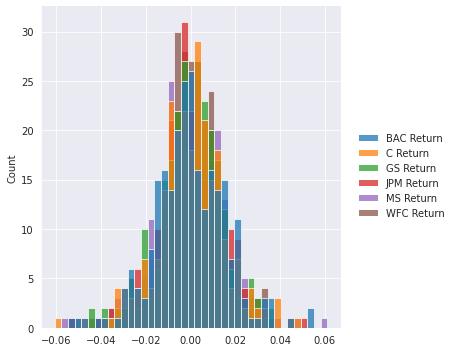

In [109]:
# your code should be here
sns.displot(ret_2015)

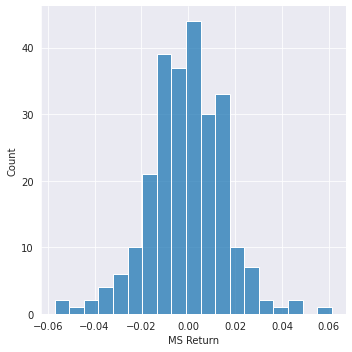

In [110]:
sns.displot(ret_2015['MS Return'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



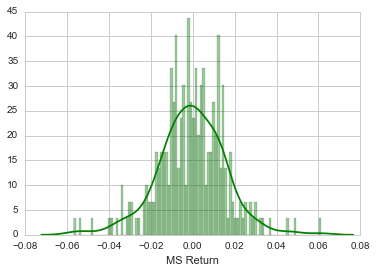

In [ ]:
#expected answer, Don't run this cell

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

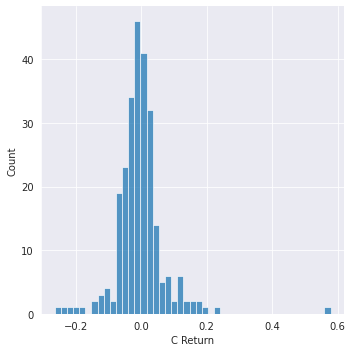

In [114]:
# your code should be here
ret_2008 = ret[returns.reset_index()['Date'].apply(lambda x: x.year == 2008)]
sns.displot(ret_2008['C Return'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



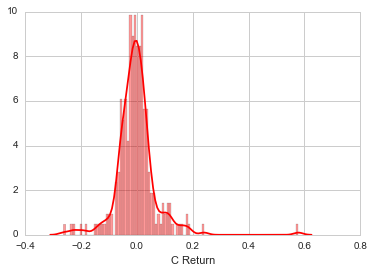

In [ ]:
#expected answer, Don't run this cell

____
# More Visualization:

**A lot of this analysis will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas**

### Imports

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

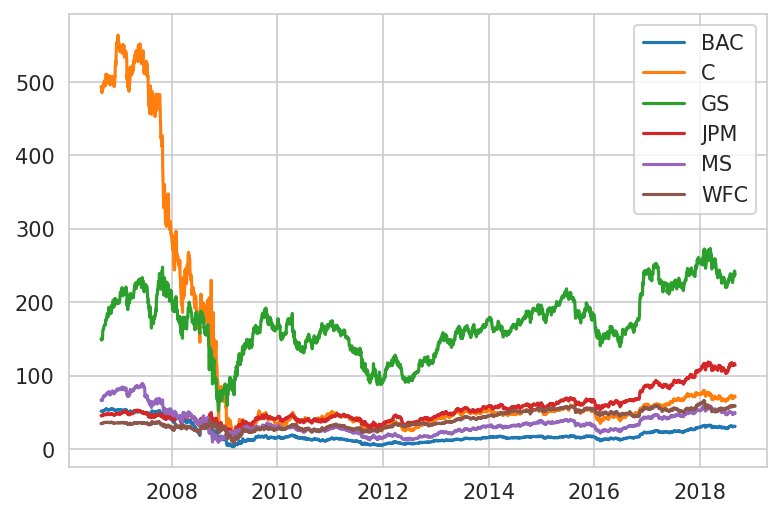

In [119]:
# your code should be here
plt.figure(dpi=150)
plt.plot(bank_stocks.xs('Close', level='Stock Info', axis=1))
plt.legend(tickers)

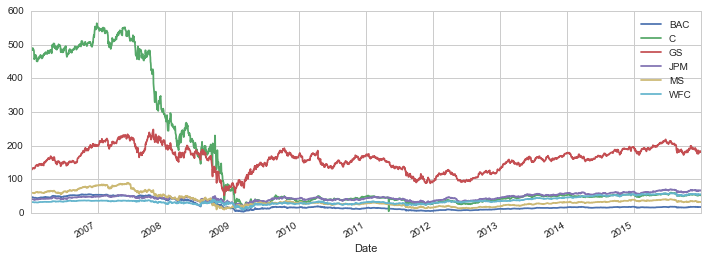

In [ ]:
#expected answer, Don't run this cell

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008** 



In [120]:
# your code should be here
plt.figure(dpi=150)
BAC['Close']

Date
2006-09-01    51.660000
2006-09-05    51.750000
2006-09-06    51.650002
2006-09-07    51.509998
2006-09-08    51.660000
                ...    
2018-08-27    31.309999
2018-08-28    31.270000
2018-08-29    31.139999
2018-08-30    31.010000
2018-08-31    30.930000
Name: Close, Length: 3021, dtype: float64

<Figure size 900x600 with 0 Axes>

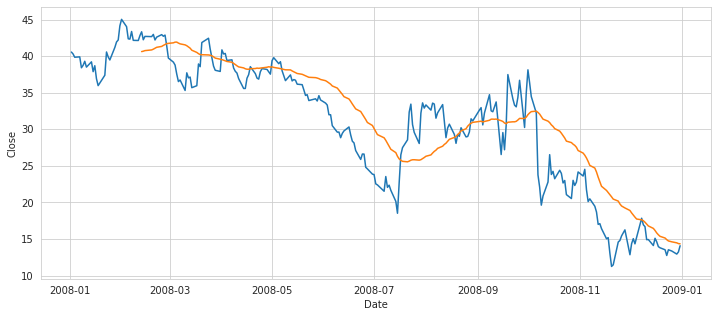

In [ ]:
#expected answer, Don't run this cell

**Create a heatmap of the correlation between the stocks Close Price: BONUS**

In [ ]:
# your code should be here

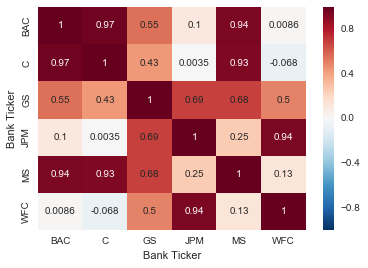

In [ ]:
#expected answer, Don't run this cell

**Optional: Use seaborn's clustermap to cluster the correlations together:**

In [ ]:
# your code should be here

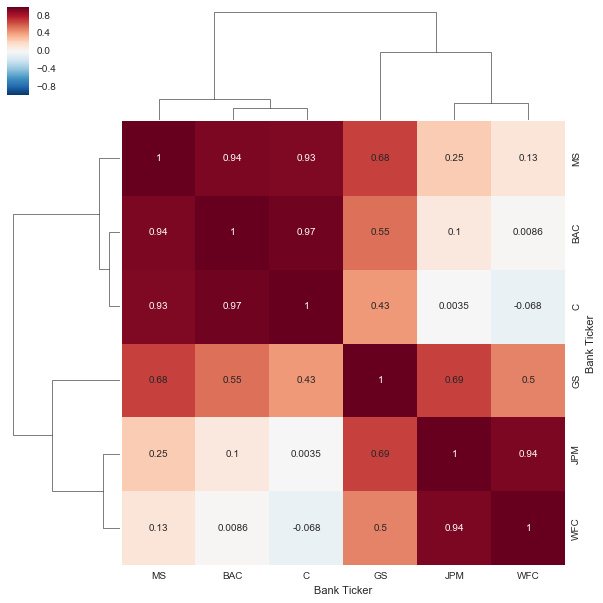

In [ ]:
#expected answer, Don't run this cell

# GREAT JOB

---



---



---



---

